In [ ]:
!pip install -r ../requirements.txt

In [29]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: C:\Users\heart\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [24]:
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset
import nltk

In [25]:
# 1. Загрузка датасета (можно заново, чтобы быть независимыми)
ds = load_dataset("legacy-datasets/banking77")

# 2. Извлечение меток
train_labels = ds["train"]["label"]
label_names = ds["train"].features["label"].names

# 3. Подсчёт количества примеров для каждого класса
label_counts = Counter(train_labels)
counts = [label_counts[i] for i in range(len(label_names))]


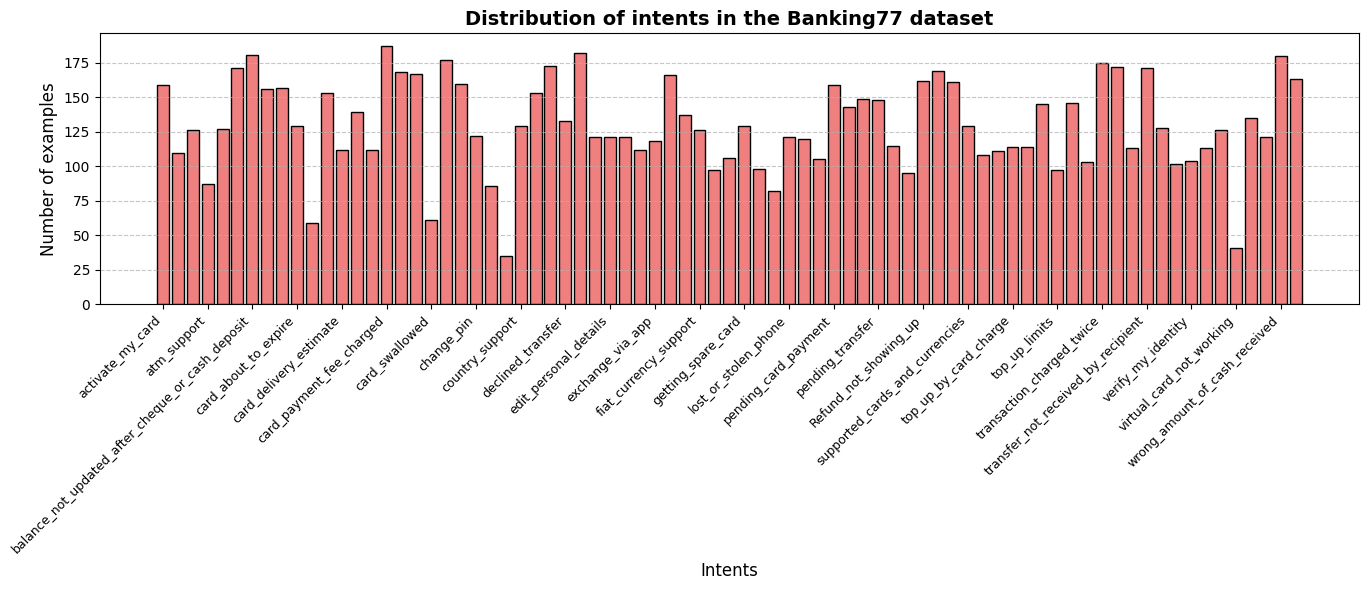

In [26]:
# 4. Построение графика
plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(label_names)), counts, color='lightcoral', edgecolor='black')

n_labels = len(label_names)
if n_labels > 20:
    step = max(1, n_labels // 20)
    plt.xticks(
        ticks=range(0, n_labels, step),
        labels=[label_names[i] for i in range(0, n_labels, step)],
        rotation=45,
        ha='right',
        fontsize=9
    )
else:
    plt.xticks(
        ticks=range(n_labels),
        labels=label_names,
        rotation=45,
        ha='right',
        fontsize=10
    )

plt.title('Distribution of intents in the Banking77 dataset', fontsize=14, weight='bold')
plt.xlabel('Intents', fontsize=12)
plt.ylabel('Number of examples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


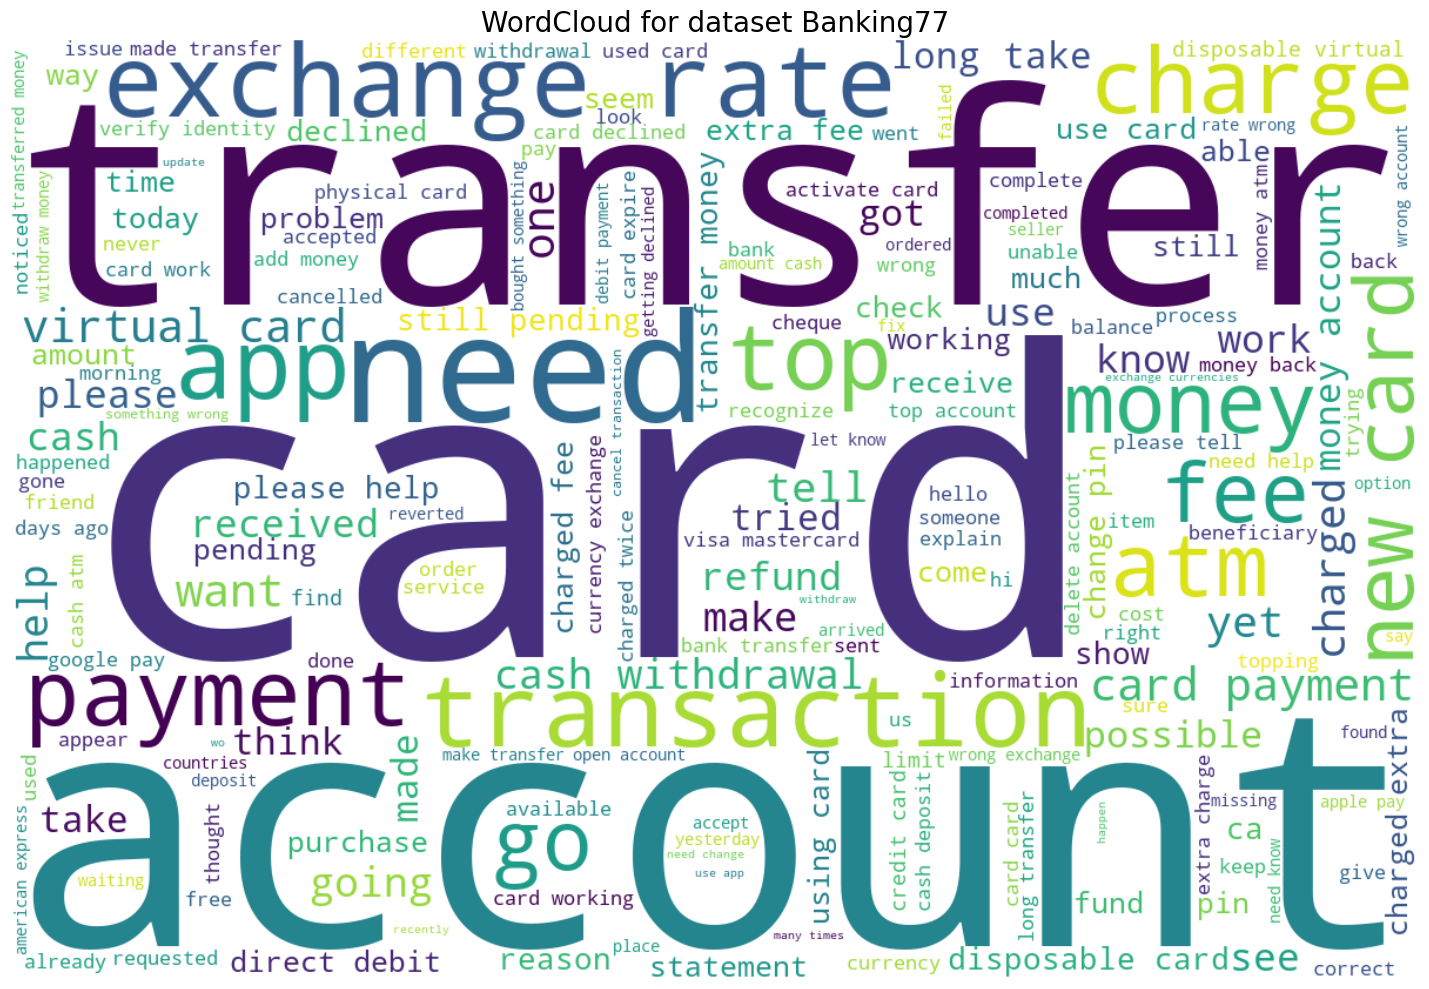

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from datasets import load_dataset
from wordcloud import WordCloud
import os
# Подгружаем нужные ресурсы NLTK (только один раз)
nltk.download('punkt')
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords')

texts = ds["train"]["text"]
all_text = " ".join(texts).lower()
tokens = word_tokenize(all_text)

stop_words = set(stopwords.words('english'))
tokens = [
    word for word in tokens
    if word not in stop_words and word not in string.punctuation and word.isalpha()
]

cleaned_text = " ".join(tokens)

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(cleaned_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for dataset Banking77", fontsize=20)
plt.tight_layout()

plt.show()

In [30]:
!pip install scikit-learn

In [ ]:
import sys
print(sys.executable)

c:\Users\heart\AppData\Local\Programs\Python\Python312\python.exe


In [36]:
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [38]:
# 1. Подготовка текстов из тренировочного датасета
texts = ds["train"]["text"]

In [39]:
# 2. TF-IDF векторизация
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()

print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Number of unique words: {len(feature_names)}")

TF-IDF matrix shape: (10003, 2097)
Number of unique words: 2097


C:\Users\heart\AppData\Local\Temp\ipykernel_15520\2348879821.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="viridis")


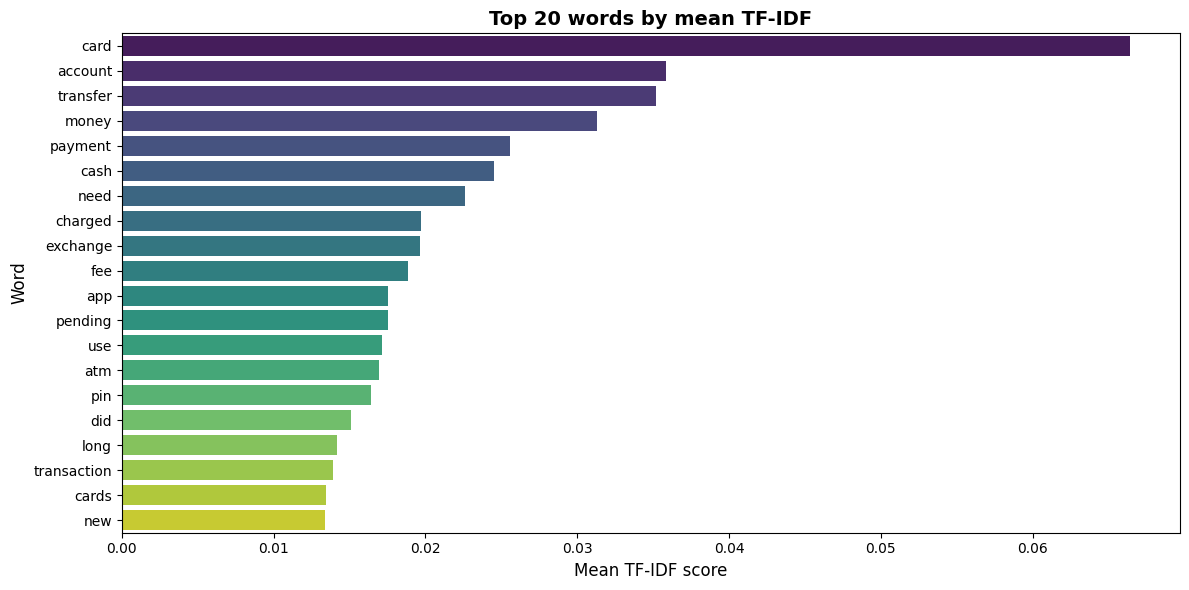

In [40]:
# 3. Топ-20 слов по среднему TF-IDF
mean_tfidf = np.asarray(X_tfidf.mean(axis=0)).ravel()
top_indices = mean_tfidf.argsort()[::-1][:20]
top_words = feature_names[top_indices]
top_scores = mean_tfidf[top_indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores, y=top_words, palette="viridis")
plt.title("Top 20 words by mean TF-IDF", fontsize=14, weight='bold')
plt.xlabel("Mean TF-IDF score", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.show()

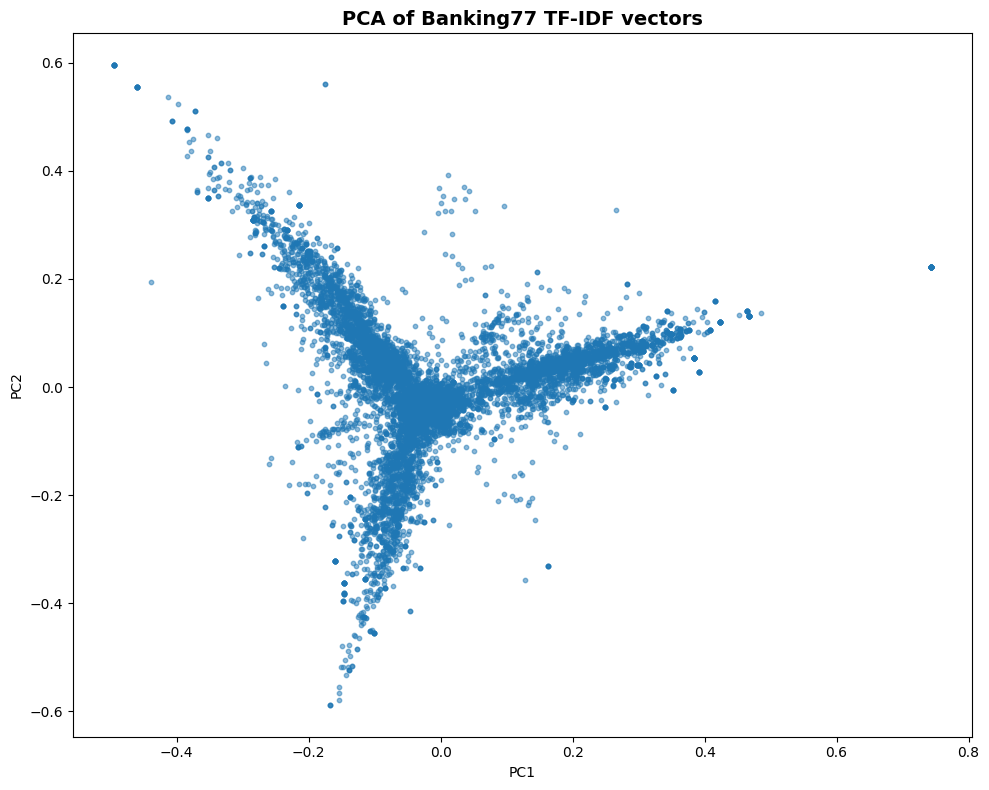

In [41]:
# 4. PCA для 2D визуализации документов
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
plt.title("PCA of Banking77 TF-IDF vectors", fontsize=14, weight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


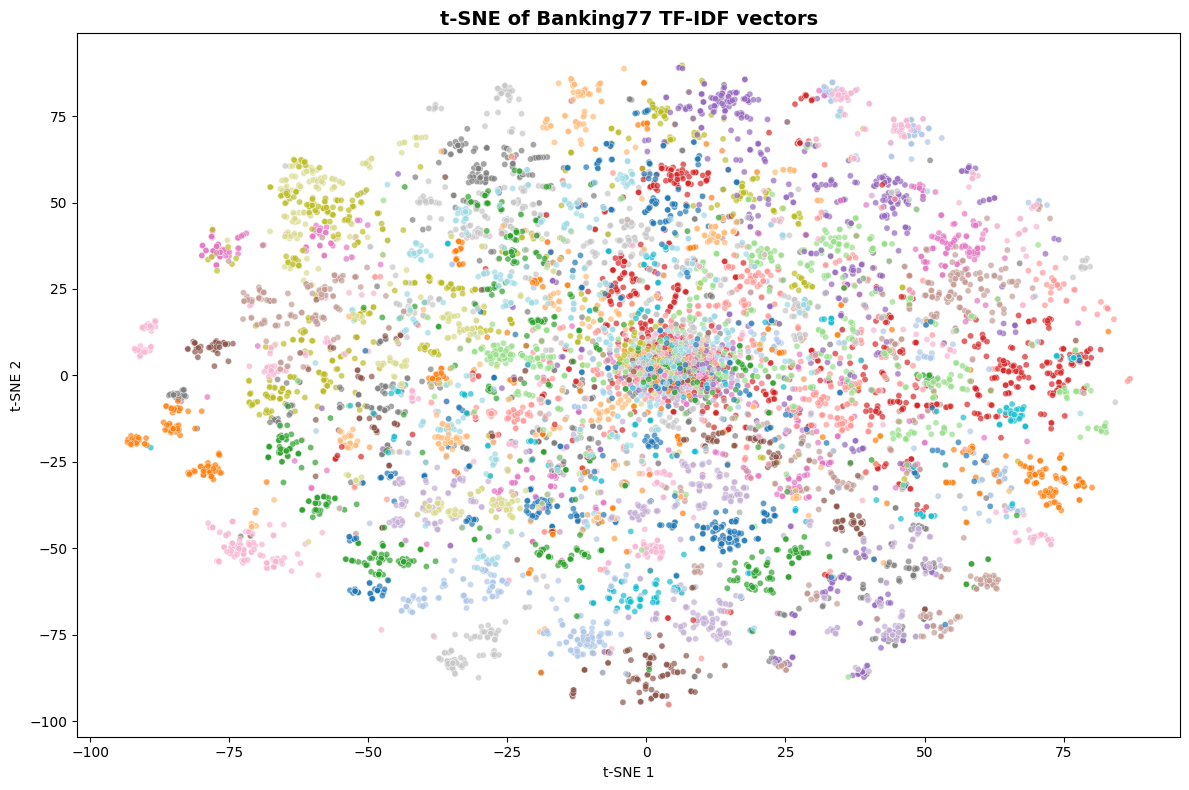

In [ ]:
# 5. t-SNE для 2D визуализации документов (классы цветом)
labels = ds["train"]["label"]
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter_without_progress=1000, n_jobs=4)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=labels,
    palette="tab20",
    legend=False,
    alpha=0.7,
    s=20
)

plt.title("t-SNE of Banking77 TF-IDF vectors", fontsize=8, weight='bold')
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()
